In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('/kaggle/input/customers-data/customers_dataset.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# ******PART 1: Visualization with Matplotlib and Seaborn******

Histogram

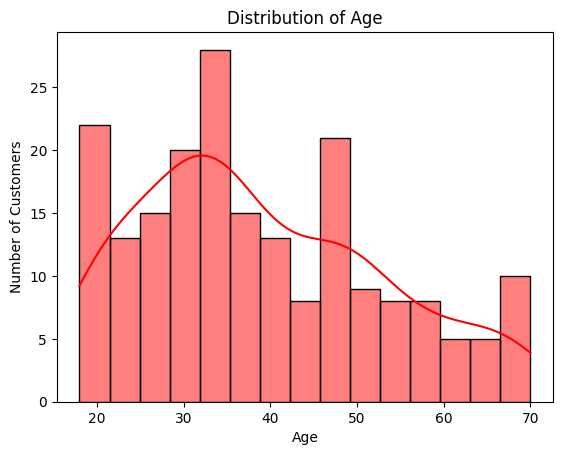

In [72]:
#Age histogram
sns.histplot(df['Age'], bins=15, kde=True, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

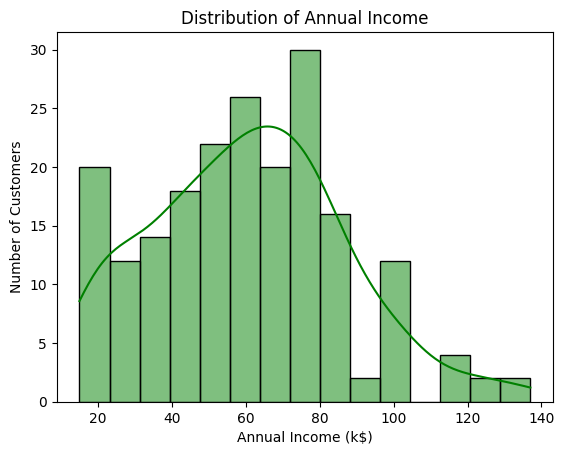

In [73]:
#Annual Income histogram
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='green')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.show()

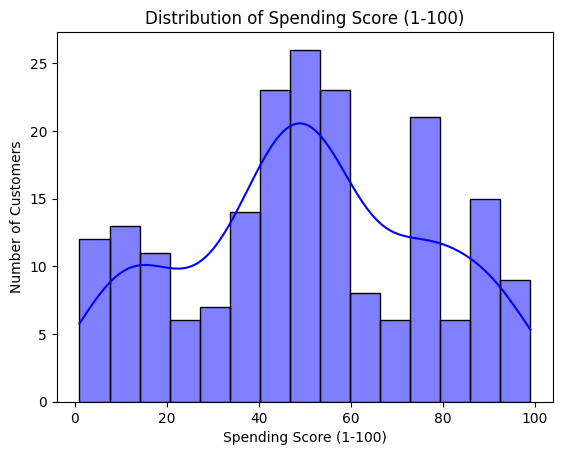

In [74]:
#Spending Score histogram
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='blue')
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.show()

Boxplots

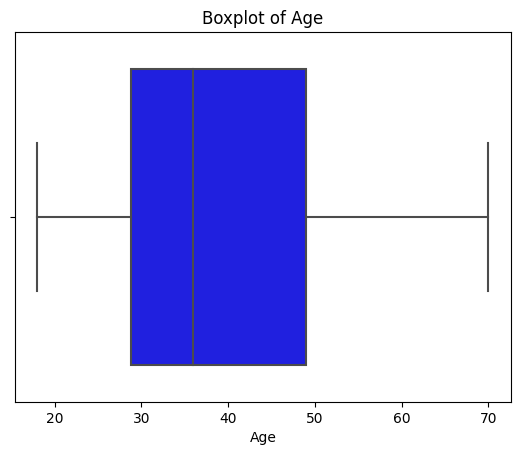

In [75]:
#age boxplot
sns.boxplot(x=df['Age'], color = 'blue')
plt.title('Boxplot of Age')
plt.show()

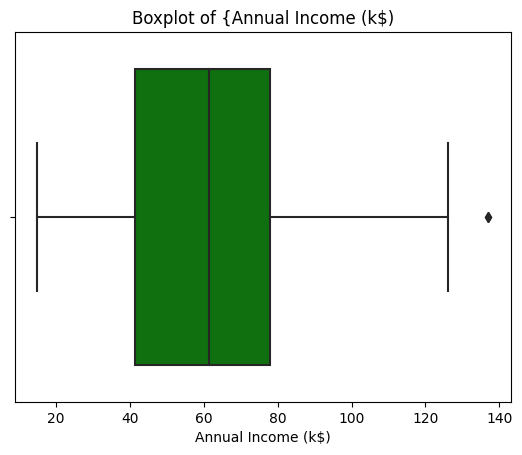

In [76]:
#annual income boxplot
sns.boxplot(x=df['Annual Income (k$)'], color = 'green')
plt.title('Boxplot of {Annual Income (k$)')
plt.show()

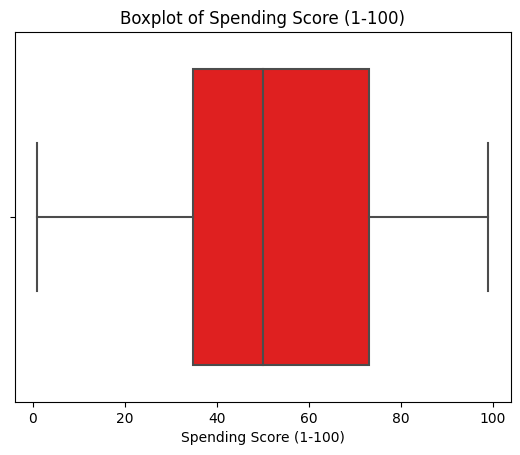

In [77]:
#spending score boxplot
sns.boxplot(x=df['Spending Score (1-100)'], color = 'red')
plt.title('Boxplot of Spending Score (1-100)')
plt.show()

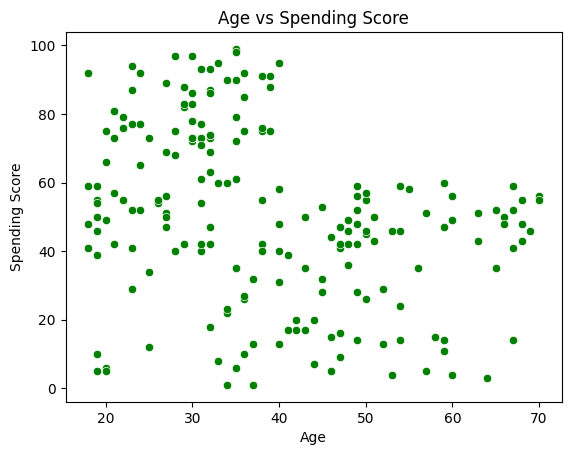

In [78]:
#age vs spending score
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, color='green')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

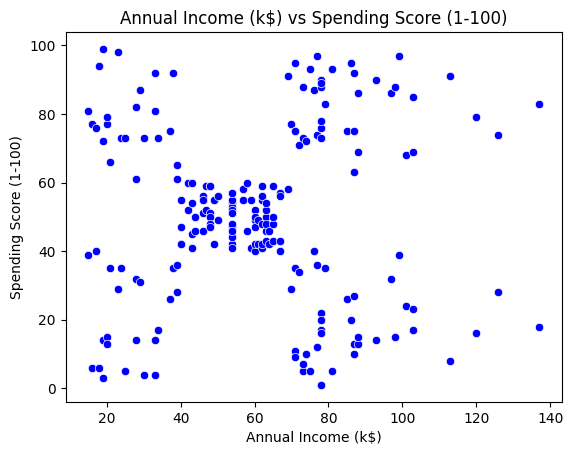

In [79]:
#annual income vs spending score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, color = 'blue')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

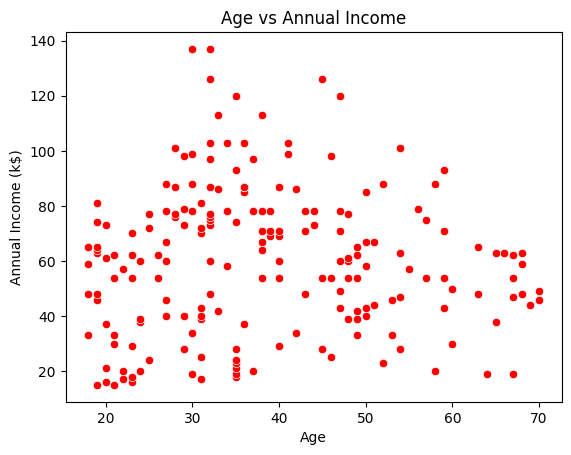

In [80]:
#age vs annual income
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, color='red')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

PairPlot

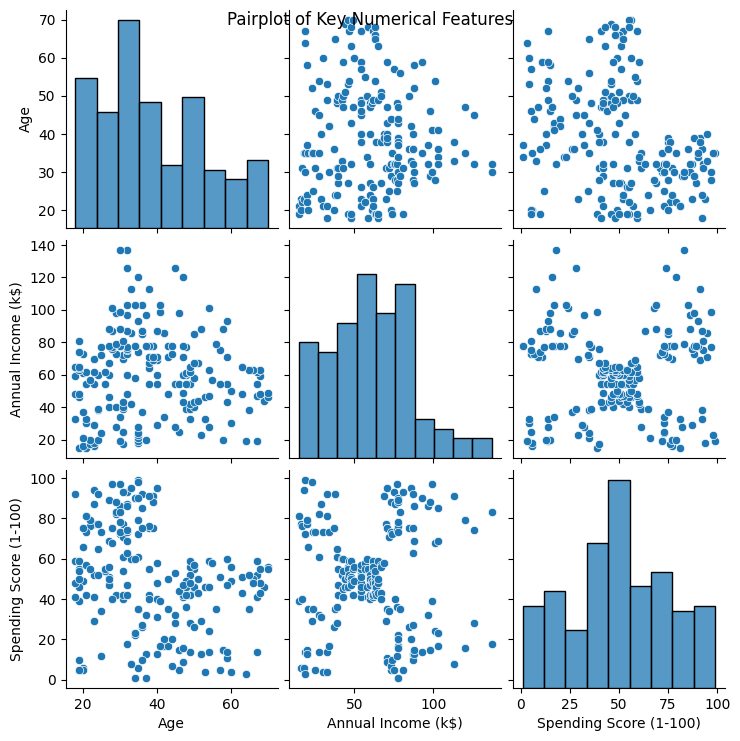

In [81]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Key Numerical Features')
plt.show()

# **PART 2: Skewness and Normalization**

Skew values for numerical data columns suggests that Age is the most skewed while Spending score is almost in normal distribution. Further I log transform annual income and age

In [82]:
skew_values = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].skew()
skew_values

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

**Log Transform**

Clearly its not impactful for Annual income, which is now skewed left by a larger factor of 0.7 compared to 0.3 earlier. Age on the other hand is almost normalized.

In [83]:
df['Age_log'] = np.log1p(df['Age'])
df['Annual_Income_log'] = np.log1p(df['Annual Income (k$)'])

print("Before transformation skew (Age):", df['Age'].skew())
print("After transformation skew (Age_log):", df['Age_log'].skew())

print("Before transformation skew (Annual Income):", df['Annual Income (k$)'].skew())
print("After transformation skew (Annual_Income_log)", df['Annual_Income_log'].skew())

Before transformation skew (Age): 0.48556885096681657
After transformation skew (Age_log): -0.08949060168904391
Before transformation skew (Annual Income): 0.3218425498619055
After transformation skew (Annual_Income_log) -0.7359971613306434


**Standard Scaler**

It can be clearly observed that the mean has been shifted to 0 (approx) and std. deviation to 1 approx. while the skewness remains the same

In [84]:
scaler_std = StandardScaler()

df[['Age_std', 'Income_std', 'Spending_std']] = scaler_std.fit_transform(df[['Age', 'Annual Income (k$)','Spending Score (1-100)']])

#skew
print(df['Age'].skew())
print(df['Age_std'].skew())
print(df['Annual Income (k$)'].skew())
print(df['Income_std'].skew())

#mean
print("Age mean before: ",df['Age'].mean())
print("Age mean after: ",df['Age_std'].mean())
print("Annual income mean before: ", df['Annual Income (k$)'].mean())
print("Annual income mean after: ", df['Income_std'].mean())
print("Spending score mean before: ", df['Spending Score (1-100)'].mean())
print("Spending score mean after: ", df['Spending_std'].mean())

#std deviation
print("Age std dev before: ",df['Age'].std())
print("Age std dev after: ",df['Age_std'].std())
print("Annual income std dev before: ", df['Annual Income (k$)'].std())
print("Annual income std dev after: ", df['Income_std'].std())
print("Spending score SD before: ", df['Spending Score (1-100)'].std())
print("Spending score SD after: ", df['Spending_std'].std())

0.48556885096681657
0.4855688509668167
0.3218425498619055
0.32184254986190564
Age mean before:  38.85
Age mean after:  -1.0658141036401502e-16
Annual income mean before:  60.56
Annual income mean after:  -7.105427357601002e-17
Spending score mean before:  50.2
Spending score mean after:  -1.021405182655144e-16
Age std dev before:  13.969007331558883
Age std dev after:  1.002509414234171
Annual income std dev before:  26.264721165271254
Annual income std dev after:  1.0025094142341713
Spending score SD before:  25.823521668370162
Spending score SD after:  1.0025094142341715


**MinMax Scaler**

Again no impact on skewness, only the mean and SD change after the data is linearly transformed by minmax scaler


In [85]:
scaler_minmax = MinMaxScaler()

df[['Age_minmax', 'Income_minmax', 'Spending_minmax']] = scaler_minmax.fit_transform(df[['Age', 'Annual Income (k$)','Spending Score (1-100)']])

#skew
print(df['Age'].skew())
print(df['Age_minmax'].skew())
print(df['Annual Income (k$)'].skew())
print(df['Income_minmax'].skew())

#mean
print("Age mean before: ",df['Age'].mean())
print("Age mean after: ",df['Age_minmax'].mean())
print("Annual income mean before: ", df['Annual Income (k$)'].mean())
print("Annual income mean after: ", df['Income_minmax'].mean())
print("Spending score mean before: ", df['Spending Score (1-100)'].mean())
print("Spending score mean after: ", df['Spending_minmax'].mean())

#std deviation
print("Age std dev before: ",df['Age'].std())
print("Age std dev after: ",df['Age_minmax'].std())
print("Annual income std dev before: ", df['Annual Income (k$)'].std())
print("Annual income std dev after: ", df['Income_minmax'].std())
print("Spending score SD before: ", df['Spending Score (1-100)'].std())
print("Spending score SD after: ", df['Spending_minmax'].std())

0.48556885096681657
0.4855688509668167
0.3218425498619055
0.32184254986190536
Age mean before:  38.85
Age mean after:  0.40096153846153854
Annual income mean before:  60.56
Annual income mean after:  0.3734426229508197
Spending score mean before:  50.2
Spending score mean after:  0.5020408163265305
Age std dev before:  13.969007331558883
Age std dev after:  0.2686347563761323
Annual income std dev before:  26.264721165271254
Annual income std dev after:  0.21528459971533798
Spending score SD before:  25.823521668370162
Spending score SD after:  0.26350532314663433


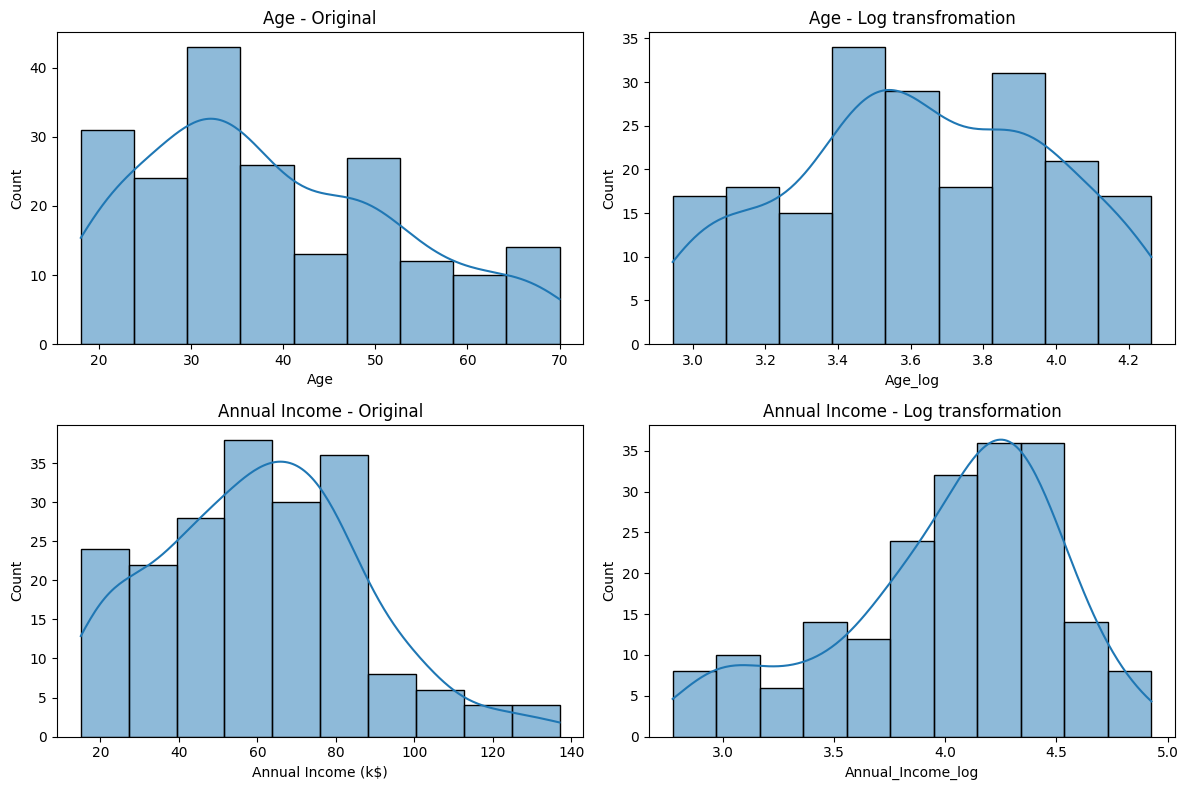

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age - Original')

sns.histplot(df['Age_log'], kde=True, ax=axes[1])
axes[1].set_title('Age - Log transfromation')

sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[2])
axes[2].set_title('Annual Income - Original')

sns.histplot(df['Annual_Income_log'], kde=True, ax=axes[3])
axes[3].set_title('Annual Income - Log transformation')

plt.tight_layout()
plt.show()

The result of part 2 are that Age_log is normalised, Spending score was normalised before as well but none of the techniqes normalised Annual income properly (it remains slighly skewed at +0.3)

Standard Scaler and MinMax scaler impacted the magnitudes of data points and changed the mean and standard deviaition though keeping the skewness same

**Stretch goals - Square root and Box-Cox**

Box-Cox has performed better in this case in reducing the skewness of annual income and age, though its not useful for spending score (not required anyways)

We now have age_box, annual_box and spending score as the least skewed parameters after applying and testing various transformations

In [87]:
df['Age_sqrt'] = np.sqrt(df['Age'])
df['Annual_Income_sqrt'] = np.sqrt(df['Annual Income (k$)'])
df['spending_score_sqrt'] = np.sqrt(df['Spending Score (1-100)'])
print("Before transformation skew (Age):", df['Age'].skew())
print("After transformation skew (Age_sqrt):", df['Age_sqrt'].skew())

print("Before transformation skew (Annual Income (k$)):", df['Annual Income (k$)'].skew())
print("After transformation skew (Annual_Income_sqrt):", df['Annual_Income_sqrt'].skew())

print("Before transformation skew (spending score (1-100)):", df['Spending Score (1-100)'].skew())
print("After transformation skew (spending_score_sqrt):", df['spending_score_sqrt'].skew())

Before transformation skew (Age): 0.48556885096681657
After transformation skew (Age_sqrt): 0.19505916013255686
Before transformation skew (Annual Income (k$)): 0.3218425498619055
After transformation skew (Annual_Income_sqrt): -0.23028952579486223
Before transformation skew (spending score (1-100)): -0.0472202013742634
After transformation skew (spending_score_sqrt): -0.7097902805855741


In [88]:
from sklearn.preprocessing import power_transform
df['age_box'] = power_transform(df[['Age']], method='box-cox')
df['annual_box'] = power_transform(df[['Annual Income (k$)']], method='box-cox')
df['spending_box'] = power_transform(df[['Spending Score (1-100)']], method='box-cox')

print("Before transformation skew (Age):", df['Age'].skew())
print("After transformation skew (Age_boxcox):", df['age_box'].skew())

print("Before transformation skew Annual income:", df['Annual Income (k$)'].skew())
print("After transformation skew (Income_boxcox):", df['annual_box'].skew())

print("Before transformation skew Spending Score:", df['Spending Score (1-100)'].skew())
print("After transformation skew (spending score_boxcox):", df['spending_box'].skew())

Before transformation skew (Age): 0.48556885096681657
After transformation skew (Age_boxcox): -0.01645316058358407
Before transformation skew Annual income: 0.3218425498619055
After transformation skew (Income_boxcox): -0.0664014566922885
Before transformation skew Spending Score: -0.0472202013742634
After transformation skew (spending score_boxcox): -0.24384202936685032


# PART 3: Clustering with K-Means

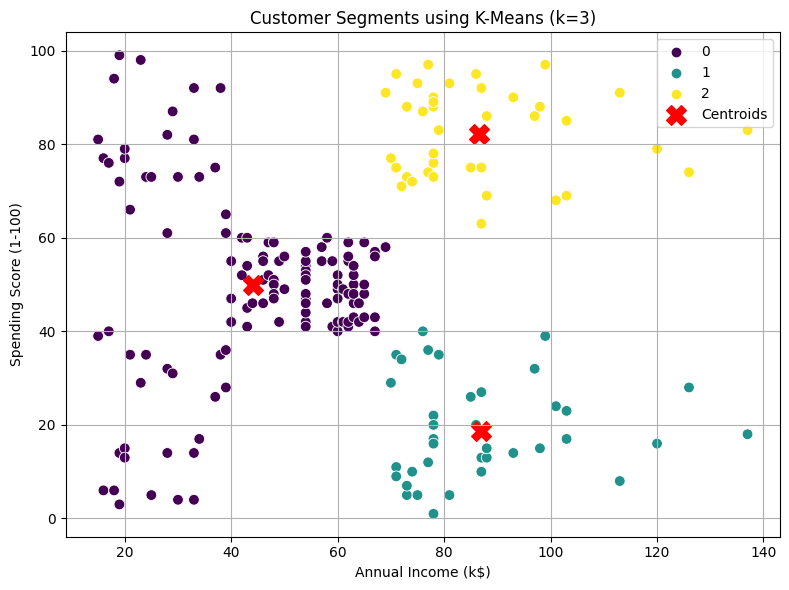

          Annual Income (k$)  Spending Score (1-100)
Cluster1                                            
0                       44.2                    49.8
1                       87.0                    18.6
2                       86.5                    82.1


In [90]:
scaler = StandardScaler()
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster1'] = kmeans.fit_predict(X_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster1', palette='viridis', s=60)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Customer Segments using K-Means (k=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(df.groupby('Cluster1')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1))

Cluster 1 : High income, low spenders
Cluster 2 : high income, high spenders 
Cluster 0 : medium income, medium spenders

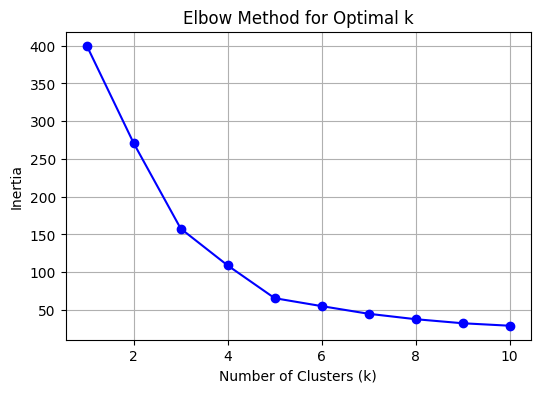

In [91]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Using the elbow method, we find that k=5 is optimal value of k

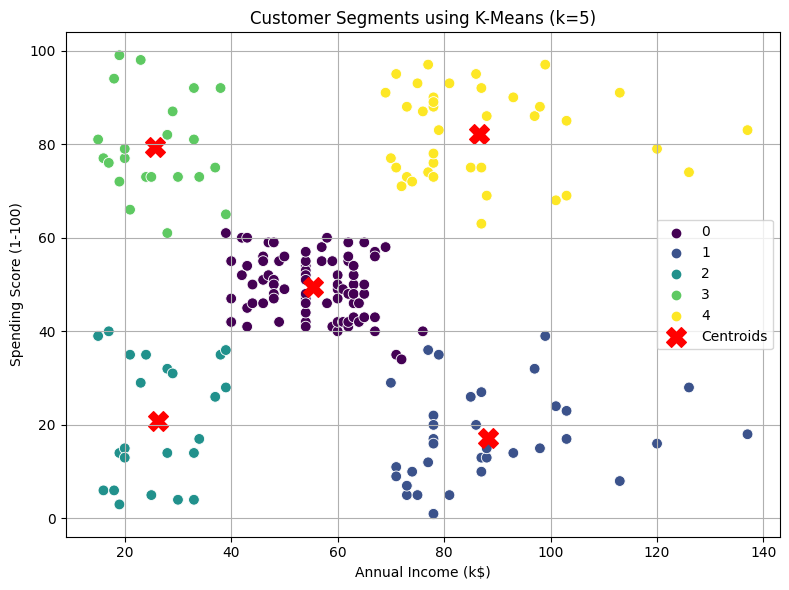

          Annual Income (k$)  Spending Score (1-100)
Cluster2                                            
0                       55.3                    49.5
1                       88.2                    17.1
2                       26.3                    20.9
3                       25.7                    79.4
4                       86.5                    82.1


In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster2'] = kmeans.fit_predict(X_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster2', palette='viridis', s=60)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Customer Segments using K-Means (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(df.groupby('Cluster2')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1))